# Previsão de Comportamento de Compra de Clientes em E-commerce

## Bibliotecas 

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Dados

**Dicionário de Dados**: E-commerce Customer Behavior

link: https://www.kaggle.com/datasets/shriyashjagtap/e-commerce-customer-for-behavior-analysis/data

- _Customer ID_: Identificador numérico único para cada cliente.
- _Purchase Date_: Data e hora exatas em que a transação de compra foi realizada.
- _Product Category_: Categoria à qual o produto comprado pertence (ex: 'Electronics', 'Home', 'Clothing').
- _Product Price_: O preço de uma única unidade do produto adquirido.
- _Quantity_: O número de unidades do produto compradas nesta transação.
- _Total Purchase_ Amount: O valor total da transação (valor do "carrinho" naquela compra).
- _Payment Method_: O método de pagamento utilizado pelo cliente (ex: 'Credit Card', 'PayPal').
- _Customer Age_: A idade do cliente. É uma coluna redundante, idêntica à coluna Age.
- _Returns_: Indica se a compra foi devolvida (1) ou não (0). Possui valores faltantes.
- _Customer Name_: O nome do cliente. É uma variável de identificação que geralmente é removida para a modelagem.
- _Age_: A idade do cliente.
- _Gender_: O gênero do cliente (ex: 'Male', 'Female').
- _Churn_: Indica se o cliente abandonou a plataforma (1) ou não (0). Esta é a variável-alvo principal para o nosso modelo.

### Import

Eu baixei o arquivo para minha maquina, mas poderiamos carregá-lo da seguinte forma:
```{python}
# importa a biblioteca do Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shriyashjagtap/e-commerce-customer-for-behavior-analysis")

df = pd.read_csv(f'{path}/ecommerce_customer_data_custom_ratios.csv')
df.head(2)

```

Vamos importar os dados que estão em nossa máquina.

In [ ]:
df_customers = pd.read_csv("dados/ecommerce_customer_data_custom_ratios.csv")
df_customers.head(2)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0


In [5]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


## Manipulação de Dados

- Podemos observar que a coluna _Customer Age_ e _Age_ são idênticas, o que indica redundância de dados. Podemos remover uma delas.

In [ ]:
# Removendo a coluna 'Customer Age' pois é redundante com a coluna 'Age'
df_cstm_clean = df_customers.drop(columns=["Customer Age"])
df_cstm_clean.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Returns',
       'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

- Vamos converter a coluna 'Purchase Date' para o tipo datetime do pandas.

In [ ]:
# Converter 'Purchase Date' para datetime
df = df_cstm_clean.copy()
df["Purchase Date"] = pd.to_datetime(df["Purchase Date"])
df["Purchase Date"].head(2)

0   2020-09-08 09:38:32
1   2022-03-05 12:56:35
Name: Purchase Date, dtype: datetime64[ns]

- Vamos analisar valores ausentes, pois percebemos que a coluna _Returns_ tem alguns valores nulos.

- Primeiramente, vamos converter a variável 'return' de float para int, pois é uma variável binária então não precisa de casas decimais.

In [ ]:
df["Returns"] = df["Returns"].astype(int)

C:\Users\Home\AppData\Local\Temp\ipykernel_2580\3132961619.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')


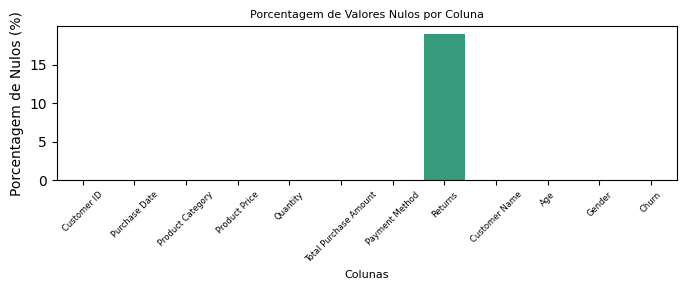

In [ ]:
# Calcular a porcentagem de valores nulos por coluna
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Criar o gráfico
plt.figure(figsize=(8, 2))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette="viridis")
plt.title("Porcentagem de Valores Nulos por Coluna", fontsize=8)
plt.xlabel("Colunas", fontsize=8)
plt.ylabel("Porcentagem de Nulos (%)", fontsize=10)
plt.xticks(rotation=45, size=6)
plt.show()

O gráfico acima mostra que apenas a coluna Returns possui valores faltantes, correspondendo a quase 20% do total de registros

## Estatistica Descritiva

In [9]:
df_customers.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.00000,250000.000000,250000.000000,250000.000000,250000.000000,202404.000000,250000.000000,250000.000000
mean,25004.03624,254.659512,2.998896,2725.370732,43.940528,0.497861,43.940528,0.199496
std,14428.27959,141.568577,1.414694,1442.933565,15.350246,0.499997,15.350246,0.399622
min,1.00000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.000000
25%,12497.75000,132.000000,2.000000,1477.000000,31.000000,0.000000,31.000000,0.000000
50%,25018.00000,255.000000,3.000000,2724.000000,44.000000,0.000000,44.000000,0.000000
75%,37506.00000,377.000000,4.000000,3974.000000,57.000000,1.000000,57.000000,0.000000
max,50000.00000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.000000


Pontos a destacar

- **Volume de Transações**: O conjunto de dados contém 250.000 observações, representando o total de transações de compra registradas.

- **Dados Faltantes**: Há um ponto de atenção na coluna Returns, que possui apenas 202.404 registros preenchidos(~81%). Isso indica que aproximadamente 19% das entradas para esta variável estão ausentes e precisarão de tratamento.

- **Base de Clientes**: Os Customer ID variam de 1 a 50.000, sugerindo que o dataset acompanha a atividade de 50.000 clientes únicos. Com 250.000 compras, isso resulta em uma média de 5 compras por cliente.

- **Faixa Etária**: A idade dos clientes (Age) varia de 18 a 70 anos. A média e a mediana são muito próximas, em torno de 44 anos, indicando que o público principal é de meia-idade, sem uma distorção significativa por clientes muito jovens ou muito idosos.

- **Redundância de Dados**: As colunas _Customer Age_ e _Age_ são estatisticamente idênticas, confirmando que uma delas pode ser removida no processo de limpeza.

- **Preço dos Produto (Product Price)**: Os preços dos itens individuais variam de $10 a $500. A média de $254.66 é quase idêntica à mediana de $255, o que sugere uma distribuição de preços bem equilibrada, sem valores extremos (outliers) influenciando a média.

- **Quantidade por Compra (Quantity)**: Os clientes compram entre 1 e 5 itens por transação. A maioria das compras (mediana) inclui 3 itens.

- **Valor Total da Compra (Total Purchase Amount)**: O valor gasto por transação vai de $100 a $5.350. Novamente, a média ($2725) e a mediana ($2724) são praticamente iguais, mostrando uma distribuição simétrica dos valores de compra.

- **Taxa de Devolução (Returns)**: Esta é uma variável binária (0 ou 1). A média de 0.497 indica que, dos registros preenchidos, cerca de 49.8% das compras resultaram em uma devolução. É uma taxa bastante elevada e um fator potencialmente importante.

- **Taxa de Abandono (Churn)**: Também uma variável binária. A média de 0.199 nos informa que aproximadamente 20% das transações no dataset pertencem a clientes que foram classificados como "churned" (que abandonaram a plataforma). Este será o nosso principal evento de interesse negativo na análise de sobrevivência.

### Análise varíavel 'Return'

- **Taxa de Devolução (Returns)**: Esta é uma variável binária (0 ou 1). A média de 0.497 indica que, dos registros preenchidos, cerca de 49.8% das compras resultaram em uma devolução. É uma taxa bastante elevada e um fator potencialmente importante.

In [ ]:
# Calcular a moda da coluna 'Returns'
mode_returns = df["Returns"].mode()[0]
print(f"Moda da coluna 'Returns': {mode_returns}")

Moda da coluna 'Returns': 0.0


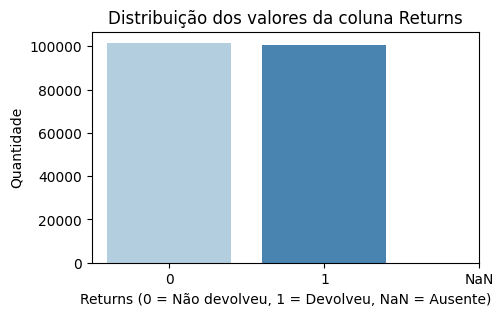

In [ ]:
# Contagem dos valores 0 e 1 na coluna 'Returns'
returns_counts = df["Returns"].value_counts(dropna=False)

plt.figure(figsize=(5, 3))
sns.barplot(
    x=returns_counts.index,
    y=returns_counts.values,
    hue=returns_counts.index,
    palette="Blues",
    legend=False,
)
plt.title("Distribuição dos valores da coluna Returns")
plt.xlabel("Returns (0 = Não devolveu, 1 = Devolveu, NaN = Ausente)")
plt.ylabel("Quantidade")
plt.xticks([0, 1, 2], ["0", "1", "NaN"])
plt.show()

Podemos observar que temos pouca diferença entra pedidos que tiveram devolução (1) e pedidos que não houveram devolução (0).Porém existem aproximadamente 19% de valores faltantes, que vamos tratar da seguinte forma:

- Vamos trabalhar com a premissa de que nulo significa que não houve devolução (valor = 0). A nossa justificativa é que a ausência de um registro de devolução implica que a devolução não aconteceu. Esta é uma prática padrão em análise de dados quando a documentação explícita não está disponível. Vamos substituir os valores nulos por 0 (não houve devolução)

C:\Users\Home\AppData\Local\Temp\ipykernel_2580\259325734.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=returns_counts_updated.index, y=returns_counts_updated.values, palette='Blues')


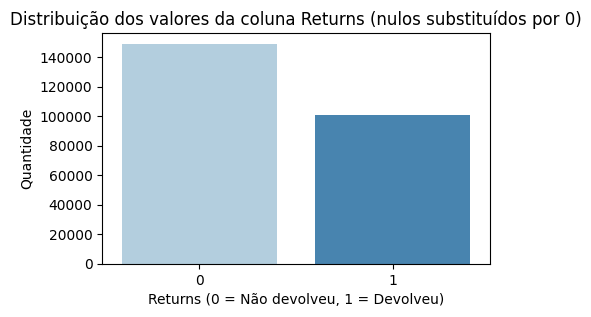

In [ ]:
# Substituir valores nulos por 0 na coluna 'Returns'
df["Returns"] = df["Returns"].fillna(0)

# Atualizar a contagem dos valores após substituição
returns_counts_updated = df["Returns"].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(5, 3))
sns.barplot(
    x=returns_counts_updated.index, y=returns_counts_updated.values, palette="Blues"
)
plt.title("Distribuição dos valores da coluna Returns (nulos substituídos por 0)")
plt.xlabel("Returns (0 = Não devolveu, 1 = Devolveu)")
plt.ylabel("Quantidade")
plt.xticks([0, 1], ["0", "1"])
plt.show()

- Agora podemos observar que temos um salto entre quem não fez devolução (0) de quem fez devolução (1)

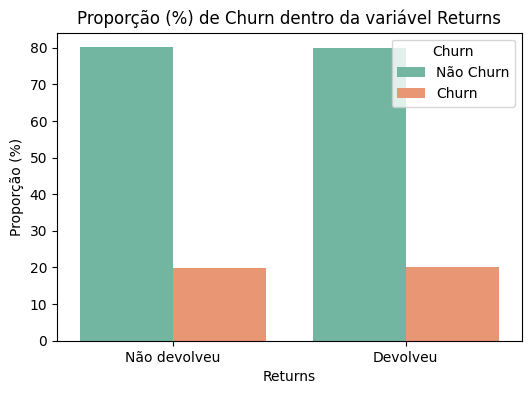

In [ ]:
# Calcular proporção de churn dentro de cada valor de Returns
prop_churn_returns = (
    df.groupby("Returns")["Churn"]
    .value_counts(normalize=True)
    .rename("Proporção")
    .mul(100)
    .reset_index()
)

# Mapear valores de Churn para texto
churn_labels = {0: "Não Churn", 1: "Churn"}
prop_churn_returns["Churn"] = prop_churn_returns["Churn"].map(churn_labels)

# Mapear valores de Returns para texto
returns_labels = {0.0: "Não devolveu", 1.0: "Devolveu"}
prop_churn_returns["Returns"] = prop_churn_returns["Returns"].map(returns_labels)

# Gráfico de barras empilhadas mostrando porcentagem
plt.figure(figsize=(6, 4))
sns.barplot(
    x="Returns", y="Proporção", hue="Churn", data=prop_churn_returns, palette="Set2"
)
plt.title("Proporção (%) de Churn dentro da variável Returns")
plt.ylabel("Proporção (%)")
plt.legend(title="Churn")  # Removido labels
plt.show()

- Ao analisar o gráfico, observamos a proporção de clientes que deram churn e não-churn dentro de cada categoria da variável 'Returns'.


### Análise das váriaveis Categóricas

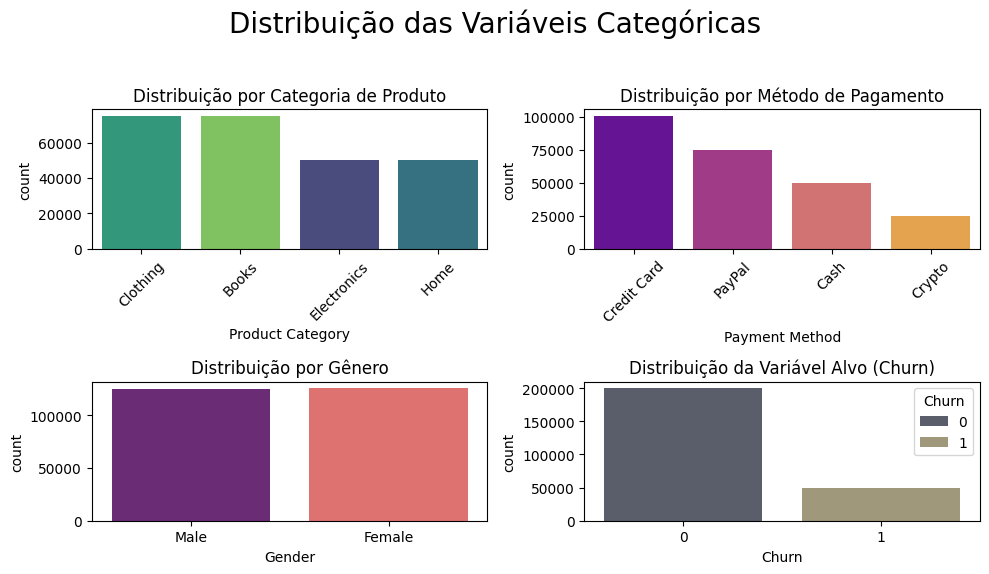

In [ ]:
# Configurando a figura para os plots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Distribuição das Variáveis Categóricas", fontsize=20)

# Gráfico 1: Product Category
sns.countplot(
    ax=axes[0, 0],
    x="Product Category",
    hue="Product Category",
    data=df,
    palette="viridis",
    order=df["Product Category"].value_counts().index,
)
axes[0, 0].set_title("Distribuição por Categoria de Produto")
axes[0, 0].tick_params(axis="x", rotation=45)

# Gráfico 2: Payment Method
sns.countplot(
    ax=axes[0, 1],
    x="Payment Method",
    hue="Payment Method",
    data=df,
    palette="plasma",
    order=df["Payment Method"].value_counts().index,
)
axes[0, 1].set_title("Distribuição por Método de Pagamento")
axes[0, 1].tick_params(axis="x", rotation=45)

# Gráfico 3: Gender
sns.countplot(ax=axes[1, 0], x="Gender", hue="Gender", data=df, palette="magma")
axes[1, 0].set_title("Distribuição por Gênero")

# Gráfico 4: Churn
sns.countplot(ax=axes[1, 1], x="Churn", hue="Churn", data=df, palette="cividis")
axes[1, 1].set_title("Distribuição da Variável Alvo (Churn)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Categoria de Produto:

-- As categorias com mais vendas são "Clothing" (Roupas) e "Books" (Livros), com volumes bem próximos.

-- Não há um desequilíbrio drástico, mas "Electronics" e "Home" são visivelmente menos vendidos que os dois primeiros.

- Método de Pagamento:

-- O "Credit Card" (Cartão de Crédito) é o método de pagamento dominante, sendo o mais utilizado.

-- A ordem de preferência é clara: Cartão de Crédito > PayPal > Cash > Crypto.

- Gênero:

-- A base de clientes é extremamente equilibrada entre os gêneros "Male" (Masculino) e "Female" (Feminino).

- Churn (Variável Alvo):

-- O gráfico confirma visualmente a proporção de churn em 20% (50.000 churns para 200.000 não-churns).

-- Isso representa um desbalanceamento de classes na proporção de 4:1, uma característica importante a ser considerada na fase de modelagem.

### Análise Bivariada

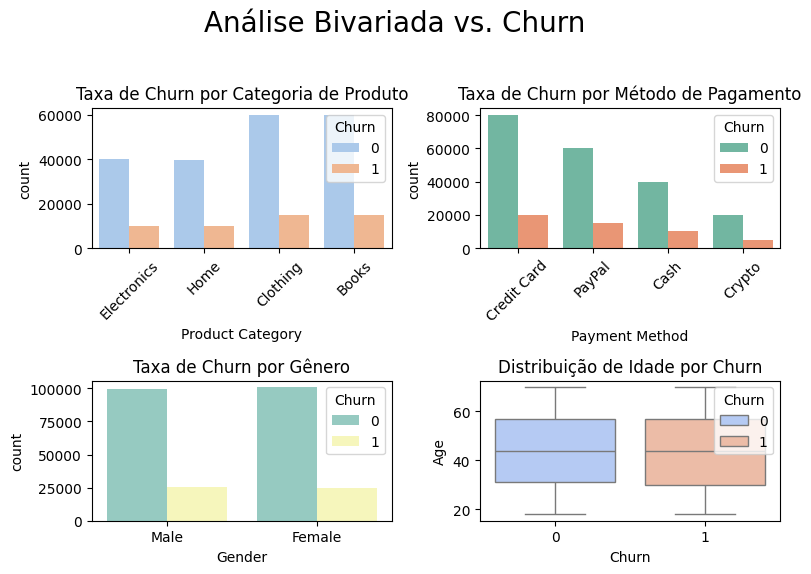

In [ ]:
# Configurando a figura para os plots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.suptitle("Análise Bivariada vs. Churn", fontsize=20)

# Gráfico 1: Churn por Categoria de Produto
sns.countplot(
    ax=axes[0, 0], x="Product Category", hue="Churn", data=df, palette="pastel"
)
axes[0, 0].set_title("Taxa de Churn por Categoria de Produto")
axes[0, 0].tick_params(axis="x", rotation=45)

# Gráfico 2: Churn por Método de Pagamento
sns.countplot(ax=axes[0, 1], x="Payment Method", hue="Churn", data=df, palette="Set2")
axes[0, 1].set_title("Taxa de Churn por Método de Pagamento")
axes[0, 1].tick_params(axis="x", rotation=45)

# Gráfico 3: Churn por Gênero
sns.countplot(ax=axes[1, 0], x="Gender", hue="Churn", data=df, palette="Set3")
axes[1, 0].set_title("Taxa de Churn por Gênero")

# Gráfico 4: Distribuição de Idade por Churn
sns.boxplot(ax=axes[1, 1], x="Churn", hue="Churn", y="Age", data=df, palette="coolwarm")
axes[1, 1].set_title("Distribuição de Idade por Churn")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Churn por Categoria de Produto:

-- A proporção de churn (barra 1) em relação ao não-churn (barra 0) parece visualmente muito semelhante em todas as quatro categorias de produtos.

-- Nenhuma categoria se destaca com uma taxa de abandono drasticamente maior ou menor, sugerindo que, isoladamente, a categoria do produto pode não ser um forte preditor de churn.

- Churn por Método de Pagamento:

-- Assim como na análise por produto, a taxa de churn aparenta ser consistente em todos os métodos de pagamento.

-- Nenhum método de pagamento específico demonstra uma propensão visivelmente maior ou menor ao churn.

- Churn por Gênero:

-- A proporção de churn é praticamente idêntica entre os gêneros "Male" e "Female".

-- Este resultado sugere fortemente que o gênero não é um fator influente para o churn neste conjunto de dados.

- Idade por Churn:

-- Aparentemente a idade para quem abandona a plataforma pode ter uma difrença para quem não abandona (= 1 ). Vamos aprofundar.

#### Análise da idade ('Age') por 'Churn'

- Como a idade parece ser o único fator que pode impactar a variavel churn, vamos analisar mais detalhamdamente.

In [ ]:
age_churn_stats = df.groupby("Churn")["Age"].describe()

print("--- Tabela de Estatísticas de Idade por Grupo de Churn ---")
print(age_churn_stats)

--- Tabela de Estatísticas de Idade por Grupo de Churn ---
          count       mean        std   min   25%   50%   75%   max
Churn                                                              
0      200126.0  43.986623  15.336229  18.0  31.0  44.0  57.0  70.0
1       49874.0  43.755564  15.405131  18.0  30.0  44.0  57.0  70.0


In [ ]:
bins = [17, 30, 40, 50, 60, 70]
labels = ["18-30", "31-40", "41-50", "51-60", "61-70"]
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

# Criar uma tabela de contingência (crosstab) para ver a contagem de churn por faixa etária
age_group_churn = pd.crosstab(df["Age Group"], df["Churn"])

# Calcular a Taxa de Churn para cada faixa
age_group_churn["Churn Rate (%)"] = (
    age_group_churn[1] / (age_group_churn[0] + age_group_churn[1])
) * 100

print("\n--- Tabela de Taxa de Churn por Faixa Etária ---")
print(age_group_churn)


--- Tabela de Taxa de Churn por Faixa Etária ---
Churn          0      1  Churn Rate (%)
Age Group                              
18-30      49463  12694       20.422479
31-40      37499   8997       19.350052
41-50      37612   9654       20.424830
51-60      37576   9236       19.729984
61-70      37976   9293       19.659819


- Aqui vemos que não há diferença significativa entre as faixas de idades, nem entre quem abandona e quem não abandona a plataforma. valos estão bem próximos e a mediana de quem abandona é igual a mediana de quem não abandona ('Age' = 44).

### Conclusão da Análise Exploratória


Ao final da Análise Exploratória de Dados (AED), foi possível traçar um perfil detalhado das transações e dos clientes. No entanto, a investigação da relação entre as variáveis e a ocorrência de Churn trouxe a descoberta mais significativa desta etapa. Constatou-se que as variáveis demográficas estáticas, como Idade e Gênero, bem como as características de compra, como Categoria de Produto e Método de Pagamento, não apresentaram, de forma isolada, uma correlação clara ou forte com a decisão de um cliente abandonar a plataforma. A hipótese inicial de que a idade seria um fator de risco, por exemplo, foi refutada pela análise numérica detalhada.

Essa ausência de um sinal em preditores simples é um resultado crucial, pois sugere que o comportamento de churn é provavelmente impulsionado por fatores mais dinâmicos e temporais, como a frequência das compras e o tempo entre elas. Este cenário não apenas valida, mas reforça a escolha da Análise de Sobrevivência como a metodologia central deste projeto, uma vez que ela é especificamente projetada para modelar o tempo até a ocorrência de um evento.

Portanto, a AED cumpre seu objetivo ao direcionar o foco da investigação para a próxima etapa indispensável: a Engenharia de Features para a criação das variáveis de tempo (duração e evento) que servirão de base para os modelos de sobrevivência.

## Engenharia de Feature